In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

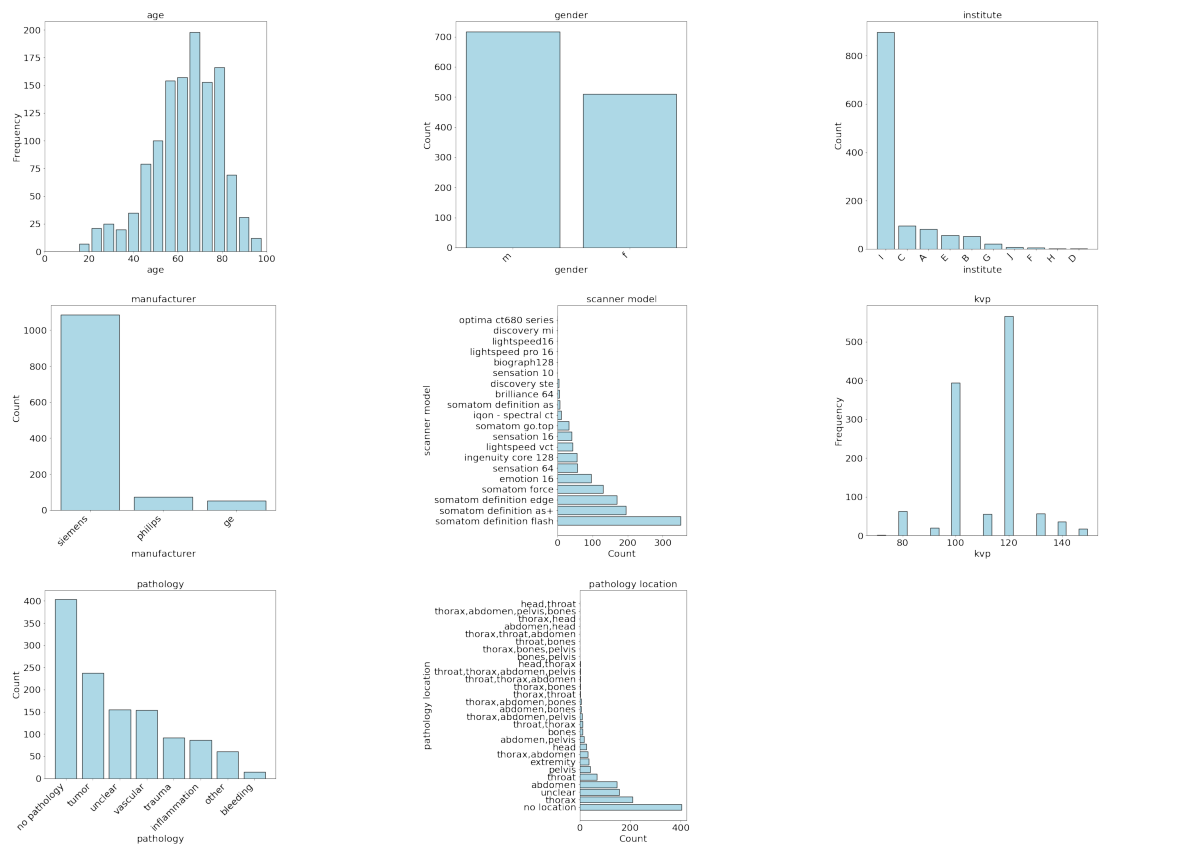

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to your metadata CSV file
metadata_file = '../utils/metaTotalSeg.csv'  # replace with the actual path to your CSV file
output_directory = '../outputs/plotsTotalSegmentator'  # Directory to save plots

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Try reading the CSV file with better error handling
df = pd.read_csv(metadata_file,sep=';')

# Function to plot the distribution of each attribute
def plot_attribute_distribution(df, attribute, filename):
    if attribute not in df.columns:
        print(f"Attribute {attribute} not found in the dataset.")
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.axis('off')
        plt.savefig(filename)
        plt.close()
        return
    
    #fig, ax = plt.subplots(figsize=(6, 4) if attribute == 'age' else (10, 8))
    #title_fontsize = 16
    #label_fontsize = 14
    #tick_fontsize = 12
    fig, ax = plt.subplots(figsize=(8, 8))
    title_fontsize = 20
    label_fontsize = 20
    tick_fontsize = 20
    title = attribute.replace('_', ' ')
    
    if attribute == 'age':
        # Plot histogram for age without KDE and with a small gap
        ax.hist(df[attribute].dropna(), bins=10, 
                edgecolor='black', color='lightblue', rwidth=0.8)
        ax.set_xlim(0, 100)
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Frequency', fontsize=label_fontsize)
    elif attribute in ['pathology_location', 'scanner_model']:
        value_counts = df[attribute].value_counts()
        value_counts.index = value_counts.index.str.replace('_', ' ')
        ax.barh(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel('Count', fontsize=label_fontsize)
        ax.set_ylabel(title, fontsize=label_fontsize)
        plt.tight_layout()
    elif df[attribute].dtype == 'object':
        value_counts = df[attribute].value_counts()
        value_counts.index = value_counts.index.str.replace('_', ' ')
        ax.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Count', fontsize=label_fontsize)
        plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
    else:
        ax.hist(df[attribute].dropna(), bins=20, edgecolor='black', color='lightblue', rwidth=0.8)
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Frequency', fontsize=label_fontsize)
    
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# List of attributes to plot
attributes = ['age', 'gender', 'institute', 'manufacturer', 'scanner_model', 'kvp', 'pathology', 'pathology_location']

# Generate and save individual plots for each attribute
for attribute in attributes:
    plot_filename = os.path.join(output_directory, f"{attribute}_distribution.png")
    plot_attribute_distribution(df, attribute, plot_filename)

# Combine all plots into one big image
fig, axes = plt.subplots(nrows=(len(attributes) + 2) // 3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, attribute in enumerate(attributes):
    img = plt.imread(os.path.join(output_directory, f"{attribute}_distribution.png"))
    axes[i].imshow(img)
    axes[i].axis('off')
    # Removed setting title here to avoid duplication

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
combined_plot_path = os.path.join(output_directory, "combined_distributions.png")
plt.savefig(combined_plot_path)
plt.show()


# Testing Set Metadata

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to your metadata CSV file
metadata_file = '../utils/metaTotalSeg.csv'  # replace with the actual path to your CSV file
output_directory = '../outputs/plotsTotalSegmentatorTestSet'  # Directory to save plots

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Try reading the CSV file with better error handling
df = pd.read_csv(metadata_file,sep=';')

In [4]:
df

,image_id,age,gender,institute,study_type,split,manufacturer,scanner_model,kvp,pathology,pathology_location
0,s1366,50.0,NaN,I,ct polytrauma,train,siemens,sensation 64,120.0,unclear,unclear
1,s0245,77.0,m,I,ct abdomen-pelvis,train,siemens,somatom definition flash,100.0,no_pathology,no_location
2,s0325,65.0,f,I,ct abdomen-pelvis,train,siemens,sensation 64,120.0,other,abdomen
3,s0320,80.0,m,I,ct angiography abdomen-pelvis-leg,train,siemens,sensation 64,120.0,vascular,abdomen
4,s0193,63.0,m,C,ct abdomen-pelvis,train,siemens,emotion 16,130.0,no_pathology,no_location
...,...,...,...,...,...,...,...,...,...,...,...
1223,s1425,NaN,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,NaN
1224,s1426,68.0,m,NaN,NaN,test,ge,lightspeed pro 16,120.0,NaN,NaN
1225,s1427,23.0,m,NaN,NaN,test,ge,lightspeed16,120.0,NaN,NaN
1226,s1428,66.0,m,NaN,NaN,test,ge,discovery mi,120.0,NaN,NaN


In [ ]:
original=df
df = pd.DataFrame(columns=original.columns)
for index, row in original.iterrows():
    if row['split']=='test':
        df = df.append(row)

In [6]:
df

,image_id,age,gender,institute,study_type,split,manufacturer,scanner_model,kvp,pathology,pathology_location
16,s0295,49.0,f,C,ct spine,test,siemens,emotion 16,130.0,no_pathology,no_location
17,s0311,55.0,m,C,ct abdomen-pelvis,test,siemens,emotion 16,130.0,no_pathology,no_location
29,s0308,62.0,m,I,ct angiography abdomen-pelvis-leg,test,siemens,somatom definition as+,120.0,bleeding,abdomen
36,s0291,65.0,f,C,ct neck-thorax-abdomen-pelvis,test,siemens,emotion 16,130.0,tumor,bones
68,s0235,44.0,f,I,ct abdomen-pelvis,test,siemens,somatom definition flash,100.0,vascular,unclear
...,...,...,...,...,...,...,...,...,...,...,...
1223,s1425,NaN,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,NaN
1224,s1426,68.0,m,NaN,NaN,test,ge,lightspeed pro 16,120.0,NaN,NaN
1225,s1427,23.0,m,NaN,NaN,test,ge,lightspeed16,120.0,NaN,NaN
1226,s1428,66.0,m,NaN,NaN,test,ge,discovery mi,120.0,NaN,NaN


Float64Index([120.0, 100.0, 130.0, 110.0, 140.0, 80.0, 150.0], dtype='float64')


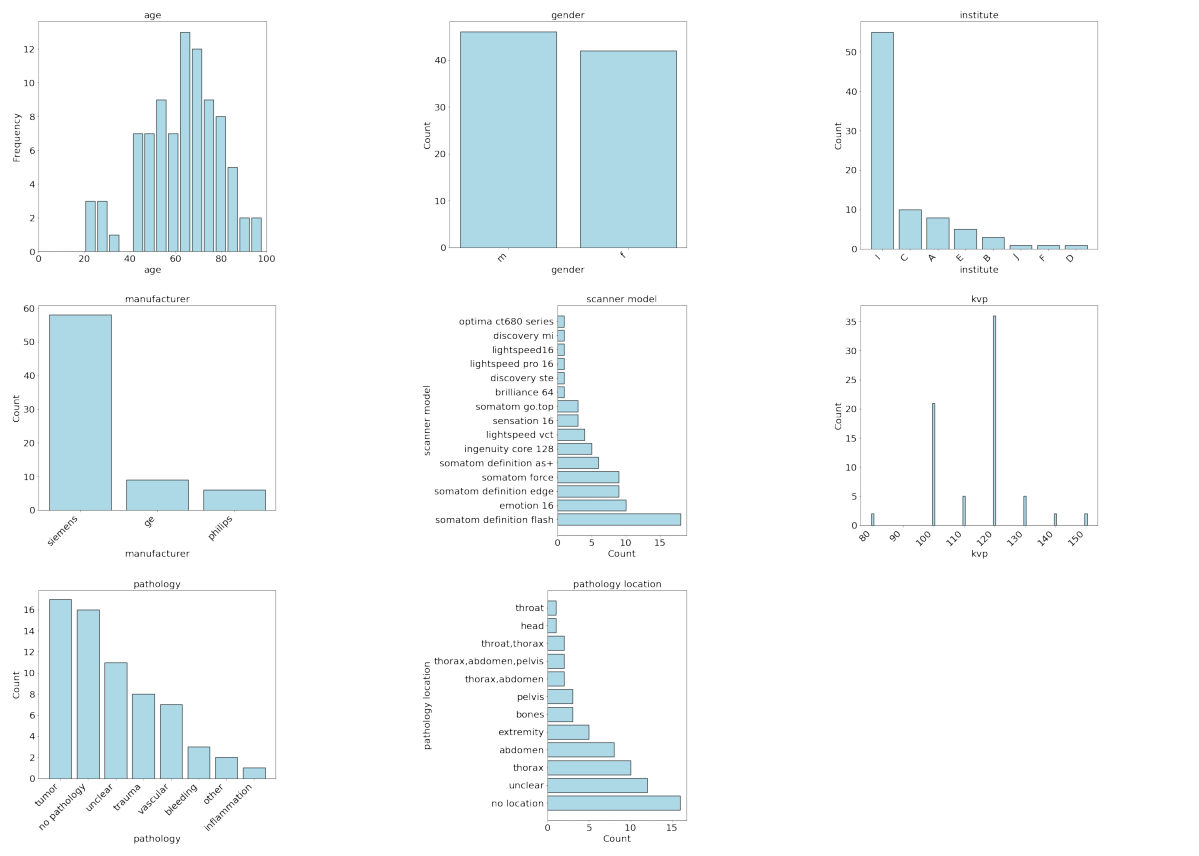

In [9]:
# Function to plot the distribution of each attribute
def plot_attribute_distribution(df, attribute, filename):
    if attribute not in df.columns:
        print(f"Attribute {attribute} not found in the dataset.")
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.axis('off')
        plt.savefig(filename)
        plt.close()
        return
    
    #fig, ax = plt.subplots(figsize=(6, 4) if attribute == 'age' else (10, 8))
    #title_fontsize = 16
    #label_fontsize = 14
    #tick_fontsize = 12
    fig, ax = plt.subplots(figsize=(8, 8))
    title_fontsize = 20
    label_fontsize = 20
    tick_fontsize = 20
    title = attribute.replace('_', ' ')
    
    if attribute == 'age':
        # Plot histogram for age without KDE and with a small gap
        ax.hist(df[attribute].dropna(), bins=10, 
                edgecolor='black', color='lightblue', rwidth=0.8)
        ax.set_xlim(0, 100)
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Frequency', fontsize=label_fontsize)
    elif attribute in ['pathology_location', 'scanner_model']:
        value_counts = df[attribute].value_counts()
        value_counts.index = value_counts.index.str.replace('_', ' ')
        ax.barh(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel('Count', fontsize=label_fontsize)
        ax.set_ylabel(title, fontsize=label_fontsize)
        plt.tight_layout()
    elif df[attribute].dtype == 'object':
        value_counts = df[attribute].value_counts()
        try:
            value_counts.index = value_counts.index.str.replace('_', ' ')
        except:
            print(value_counts.index)
        ax.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Count', fontsize=label_fontsize)
        plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
    else:
        ax.hist(df[attribute].dropna(), bins=20, edgecolor='black', color='lightblue', rwidth=0.8)
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Frequency', fontsize=label_fontsize)
    
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# List of attributes to plot
attributes = ['age', 'gender', 'institute', 'manufacturer', 'scanner_model', 
              'kvp', 'pathology', 'pathology_location']

# Generate and save individual plots for each attribute
for attribute in attributes:
    plot_filename = os.path.join(output_directory, f"{attribute}_distribution.png")
    plot_attribute_distribution(df, attribute, plot_filename)

# Combine all plots into one big image
fig, axes = plt.subplots(nrows=(len(attributes) + 2) // 3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, attribute in enumerate(attributes):
    img = plt.imread(os.path.join(output_directory, f"{attribute}_distribution.png"))
    axes[i].imshow(img)
    axes[i].axis('off')
    # Removed setting title here to avoid duplication

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
combined_plot_path = os.path.join(output_directory, "combined_distributions.png")
plt.savefig(combined_plot_path)
plt.show()


# Training set meatadata

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to your metadata CSV file
metadata_file = '../utils/metaTotalSeg.csv'  # replace with the actual path to your CSV file
output_directory = '../outputs/plotsTotalSegmentatorTrainSet'  # Directory to save plots

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Try reading the CSV file with better error handling
df = pd.read_csv(metadata_file,sep=';')

original=df
df = pd.DataFrame(columns=original.columns)
for index, row in original.iterrows():
    if row['split']=='train':
        df = df.append(row)

# Function to plot the distribution of each attribute
def plot_attribute_distribution(df, attribute, filename):
    if attribute not in df.columns:
        print(f"Attribute {attribute} not found in the dataset.")
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.axis('off')
        plt.savefig(filename)
        plt.close()
        return
    
    #fig, ax = plt.subplots(figsize=(6, 4) if attribute == 'age' else (10, 8))
    #title_fontsize = 16
    #label_fontsize = 14
    #tick_fontsize = 12
    fig, ax = plt.subplots(figsize=(8, 8))
    title_fontsize = 20
    label_fontsize = 20
    tick_fontsize = 20
    title = attribute.replace('_', ' ')
    
    if attribute == 'age':
        # Plot histogram for age without KDE and with a small gap
        ax.hist(df[attribute].dropna(), bins=10, 
                edgecolor='black', color='lightblue', rwidth=0.8)
        ax.set_xlim(0, 100)
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Frequency', fontsize=label_fontsize)
    elif attribute in ['pathology_location', 'scanner_model']:
        value_counts = df[attribute].value_counts()
        value_counts.index = value_counts.index.str.replace('_', ' ')
        ax.barh(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel('Count', fontsize=label_fontsize)
        ax.set_ylabel(title, fontsize=label_fontsize)
        plt.tight_layout()
    elif df[attribute].dtype == 'object':
        value_counts = df[attribute].value_counts()
        try:
            value_counts.index = value_counts.index.str.replace('_', ' ')
        except:
            print(value_counts.index)
        ax.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Count', fontsize=label_fontsize)
        plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
    else:
        ax.hist(df[attribute].dropna(), bins=20, edgecolor='black', color='lightblue', rwidth=0.8)
        ax.set_title(f'{title}', fontsize=title_fontsize)
        ax.set_xlabel(title, fontsize=label_fontsize)
        ax.set_ylabel('Frequency', fontsize=label_fontsize)
    
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# List of attributes to plot
attributes = ['age', 'gender', 'institute', 'manufacturer', 'scanner_model', 
              'kvp', 'pathology', 'pathology_location']

# Generate and save individual plots for each attribute
for attribute in attributes:
    plot_filename = os.path.join(output_directory, f"{attribute}_distribution.png")
    plot_attribute_distribution(df, attribute, plot_filename)

# Combine all plots into one big image
fig, axes = plt.subplots(nrows=(len(attributes) + 2) // 3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, attribute in enumerate(attributes):
    img = plt.imread(os.path.join(output_directory, f"{attribute}_distribution.png"))
    axes[i].imshow(img)
    axes[i].axis('off')
    # Removed setting title here to avoid duplication

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
combined_plot_path = os.path.join(output_directory, "combined_distributions.png")
plt.savefig(combined_plot_path)
plt.show()


# Divide by groups

In [17]:
# Define the path to your metadata CSV file
metadata_file = '../utils/metaTotalSeg.csv'  # replace with the actual path to your CSV file
output_directory = '../outputs/plotsTotalSegmentator'  # Directory to save plots

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Try reading the CSV file with better error handling
df = pd.read_csv(metadata_file,sep=';')

In [18]:
df

,image_id,age,gender,institute,study_type,split,manufacturer,scanner_model,kvp,pathology,pathology_location
0,s1366,50.0,NaN,I,ct polytrauma,train,siemens,sensation 64,120.0,unclear,unclear
1,s0245,77.0,m,I,ct abdomen-pelvis,train,siemens,somatom definition flash,100.0,no_pathology,no_location
2,s0325,65.0,f,I,ct abdomen-pelvis,train,siemens,sensation 64,120.0,other,abdomen
3,s0320,80.0,m,I,ct angiography abdomen-pelvis-leg,train,siemens,sensation 64,120.0,vascular,abdomen
4,s0193,63.0,m,C,ct abdomen-pelvis,train,siemens,emotion 16,130.0,no_pathology,no_location
...,...,...,...,...,...,...,...,...,...,...,...
1223,s1425,NaN,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,NaN
1224,s1426,68.0,m,NaN,NaN,test,ge,lightspeed pro 16,120.0,NaN,NaN
1225,s1427,23.0,m,NaN,NaN,test,ge,lightspeed16,120.0,NaN,NaN
1226,s1428,66.0,m,NaN,NaN,test,ge,discovery mi,120.0,NaN,NaN


In [19]:
gender={'male':[],
        'female':[]}
ages={'18-29':[],
      '30-39':[],
      '40-49':[],
      '50-59':[],
      '60-69':[],
      '70-79':[],
      '80-89':[],
      '90-99':[],
     }
diagnosis={'no_pathology':[],
           'tumor':[],
           'unclear':[],
           'vascular':[],
           'trauma':[],
           'inflammation':[],
           'bleeding':[],
           'other':[]}
manufacturer={}
scanner_model={}
institute={}

for index, row in df.iterrows():
    tmp=False
    for key in ages:
        if (row['age']>=int(key[:2]) and row['age']<=int(key[-2:])):
            ages[key].append(row['image_id'])
            tmp=True
    if not tmp:
        print('Unrecognized value for age: ',row['age'])
    if row['gender']=='m':
        gender['male'].append(row['image_id'])
    elif row['gender']=='f':
        gender['female'].append(row['image_id'])
    else:
        print('Unrecognized value for sex: ',row['gender'])
    tmp2=False
    for key in diagnosis:
        if row['pathology']==key:
            diagnosis[key].append(row['image_id'])
            tmp2=True
    if not tmp2:
        print('Unrecognized value for diagnosis: ',row['pathology'])
    if row['manufacturer'] not in list(manufacturer.keys()):
        manufacturer[row['manufacturer']]=[]
    if row['scanner_model'] not in list(scanner_model.keys()):
        scanner_model[row['scanner_model']]=[]
    if row['institute'] not in list(institute.keys()):
        institute[row['institute']]=[]    
    manufacturer[row['manufacturer']].append(row['image_id'])
    scanner_model[row['scanner_model']].append(row['image_id'])
    institute[row['institute']].append(row['image_id'])

Unrecognized value for sex:  nan
Unrecognized value for age:  17.0
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for age:  15.0
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for age:  nan
Unrecognized value for sex:  nan
Unrecognized value for diagnosis:  nan
Unrecognized value for diagnosis:  nan
Unrecognized v

In [20]:
tmp=0
for key in gender:
    tmp+=len(gender[key])
print(tmp)

1226


In [21]:
tmp=0
for key in diagnosis:
    tmp+=len(diagnosis[key])
print(tmp)

1204


In [22]:
tmp=0
for key in ages:
    tmp+=len(ages[key])
print(tmp)

1225


In [23]:
tmp=0
for key in manufacturer:
    tmp+=len(manufacturer[key])
print(tmp)

1228


In [24]:
tmp=0
for key in scanner_model:
    tmp+=len(scanner_model[key])
print(tmp)

1228


In [25]:
tmp=0
for key in institute:
    tmp+=len(institute[key])
print(tmp)

1228


In [26]:
manufacturer.keys()

dict_keys(['siemens', 'ge', nan, 'philips'])

In [27]:
institute.keys()

dict_keys(['I', 'C', 'B', 'A', 'G', 'J', 'E', 'H', 'F', 'D', nan])

In [28]:
scanner_model.keys()

dict_keys(['sensation 64', 'somatom definition flash', 'emotion 16', 'somatom definition as+', 'sensation 16', 'discovery ste', nan, 'sensation 10', 'somatom definition edge', 'ingenuity core 128', 'lightspeed vct', 'iqon - spectral ct', 'somatom definition as', 'brilliance 64', 'somatom force', 'somatom go.top', 'biograph128', 'lightspeed pro 16', 'lightspeed16', 'discovery mi', 'optima ct680 series'])

In [29]:
import torch
torch.save(gender['male'],output_directory+'/sex_male_totalsegmentator.pt')
torch.save(gender['female'],output_directory+'/sex_female_totalsegmentator.pt')
for key in ages:
    torch.save(ages[key],output_directory+'/ages_'+key+'_totalsegmentator.pt')
for key in diagnosis:
    if isinstance(key,str):
        torch.save(diagnosis[key],output_directory+'/diagnosis_'+key+'_totalsegmentator.pt')
for key in manufacturer:
    if isinstance(key,str):
        torch.save(manufacturer[key],output_directory+'/manufacturer_'+key+'_totalsegmentator.pt')
for key in institute:
    if isinstance(key,str):
        torch.save(institute[key],output_directory+'/institute_'+key+'_totalsegmentator.pt')
for key in scanner_model:
    if isinstance(key,str):
        torch.save(scanner_model[key],output_directory+'/scanner_model_'+key+'_totalsegmentator.pt')
